Importing required libraries and packages

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.9 MB/s eta 0:00:00


In [2]:
import shap
import keras
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import random

#SVM For Iris Dataset

In [3]:
# Getting the dataset ready
iris = load_iris()
X, y = iris['data'], iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [4]:
# Building and fitting the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
# Evaluating the model
model.score(X_test, y_test)

1.0

In [6]:
# Initializing SHAP explainer object and creating SHAP values
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_train, 10))
shap_values = explainer.shap_values(X_test)

  0%|          | 0/30 [00:00<?, ?it/s]

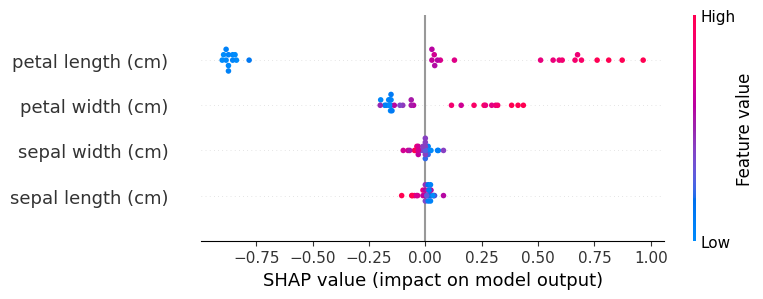

In [7]:
# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=iris['feature_names'])

In [8]:
print(y_test)

[0 2 2 1 0 1 0 1 0 2 0 0 1 0 0 2 2 2 0 0 0 1 0 2 2 2 1 1 2 2]


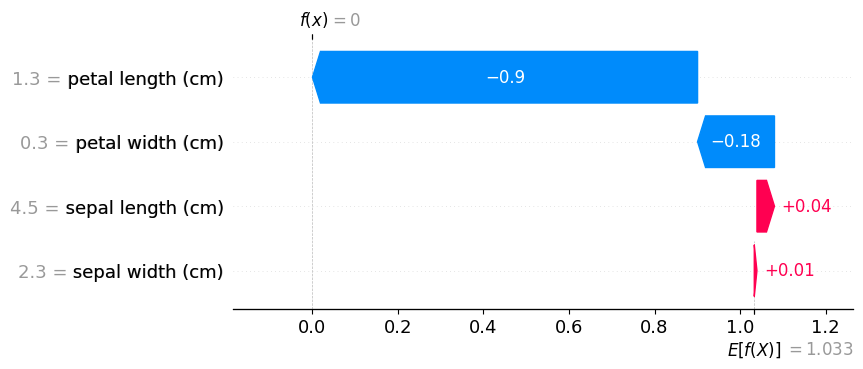

In [9]:
# Waterfall model for a specific prediction
base_value = explainer.expected_value
index = 6                                     # Index of the prediction we want to interpret

explanation = shap.Explanation(shap_values[index], base_value, X_test[index], feature_names=iris['feature_names'])

shap.waterfall_plot(explanation)

In [10]:
# Force Plot
index = 6                                     # Index of the prediction we want to interpret

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test[index], feature_names=iris['feature_names'])

In [11]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

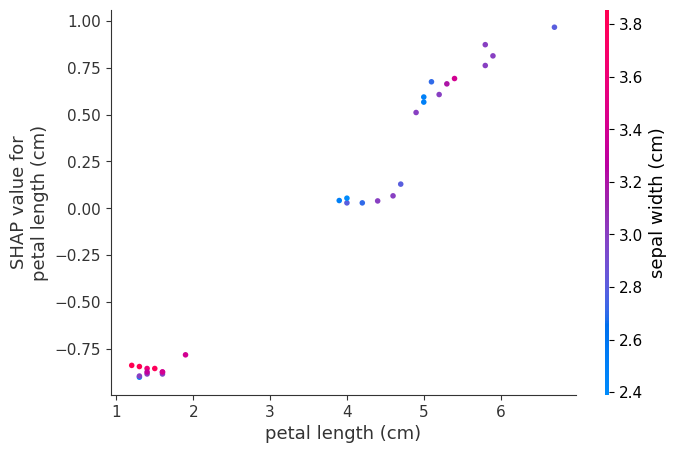

In [12]:
# Dependence plot

feature_name = 'petal length (cm)'

shap.dependence_plot(feature_name, shap_values, X_test, feature_names=iris['feature_names'], interaction_index="sepal width (cm)")

In [13]:
# Getting the dataset ready
wine = load_wine()

data = wine.data
target = wine.target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [14]:
# Building and fitting the model

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
# Initializing the SHAP explainer object and creating the SHAP values
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_test, 10))
shap_values = explainer.shap_values(X_test)

  0%|          | 0/36 [00:00<?, ?it/s]

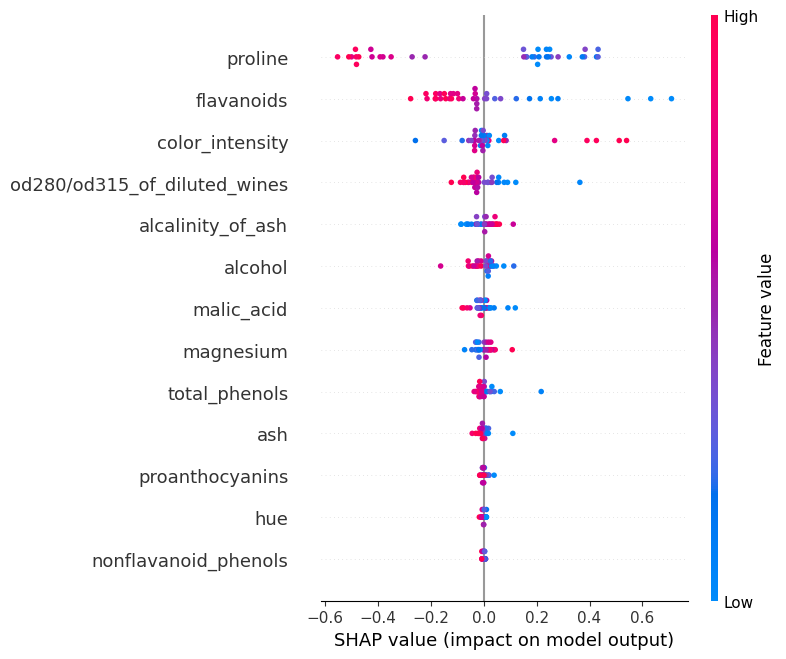

In [16]:
# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=wine['feature_names'])

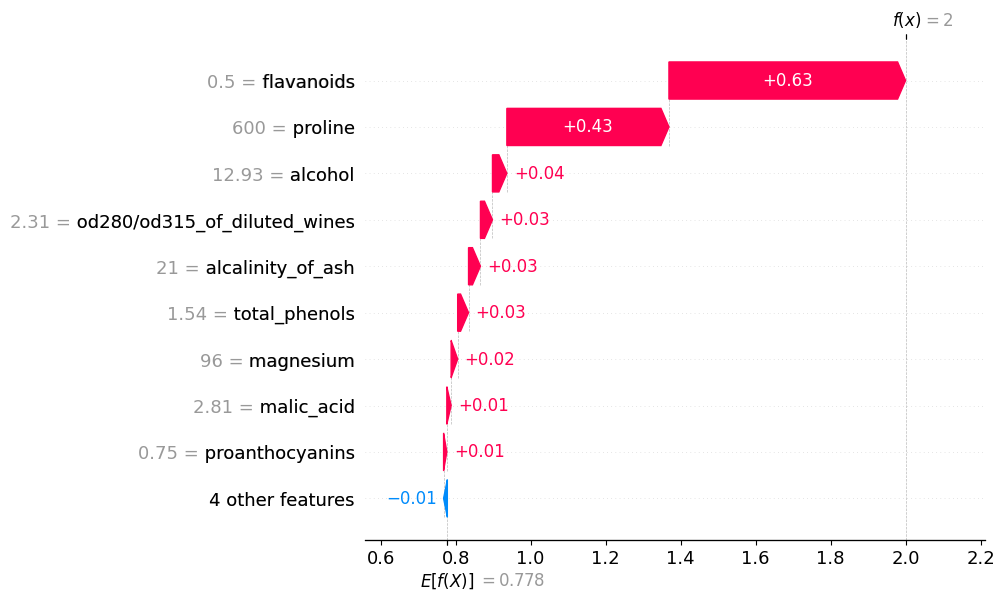

In [17]:
# Waterfall Plot for particular data instance
base_value = explainer.expected_value
data = X_test[2]

explanation = shap.Explanation(shap_values[2], base_value, data, feature_names=wine['feature_names'])

shap.waterfall_plot(explanation)

In [18]:
# Force Plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2], X_test[2], feature_names=wine['feature_names'])

In [19]:
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


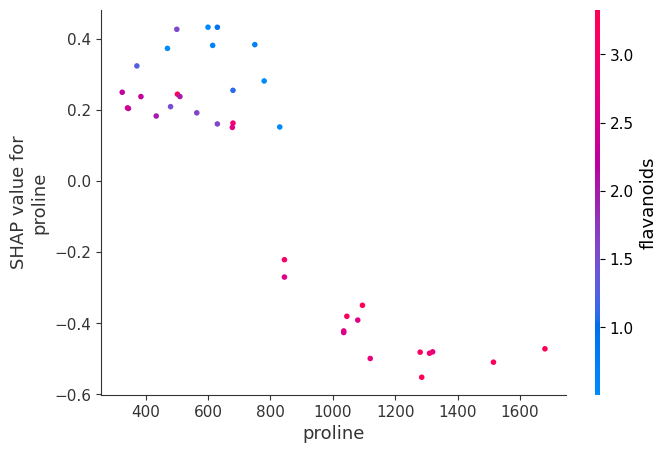

In [20]:
# Dependence Plot
feature_name = 'proline'

shap.dependence_plot(feature_name, shap_values, X_test, feature_names=wine['feature_names'], interaction_index="flavanoids")

# CNN MODEL FOR MNIST DATASET

In [21]:
# Processing and getting the data ready
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 [==============================] - 0s 0us/step


In [22]:
# Define architecture of the model function
def build_nn():
  model = keras.Sequential()
  model.add(Input(shape=(28, 28, 1)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
  # model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
  # model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(45, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation = 'softmax'))
  return model

In [23]:
# Initialize the model
model = build_nn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0

In [24]:
# Build and Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 70s 135ms/step - loss: 0.4938 - accuracy: 0.8414 - val_loss: 0.0998 - val_accuracy: 0.9705
Epoch 2/10
480/480 [==============================] - 56s 117ms/step - loss: 0.1870 - accuracy: 0.9432 - val_loss: 0.0651 - val_accuracy: 0.9824
Epoch 3/10
480/480 [==============================] - 56s 116ms/step - loss: 0.1432 - accuracy: 0.9568 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 4/10
480/480 [==============================] - 54s 112ms/step - loss: 0.1237 - accuracy: 0.9617 - val_loss: 0.0449 - val_accuracy: 0.9871
Epoch 5/10
480/480 [==============================] - 54s 113ms/step - loss: 0.1079 - accuracy: 0.9674 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 6/10
480/480 [==============================] - 52s 109ms/step - loss: 0.1007 - accuracy: 0.9695 - val_loss: 0.0422 - val_accuracy: 0.9877
Epoch 7/10
480/480 [==============================] - 56s 117ms/step - loss: 0.0919 - accuracy: 0.9726 - val_loss: 0.0395 - val_ac

In [27]:
# Initialize Deep Explainer object for dataset and generate SHAP values
shap_dataset = x_train[np.random.choice(x_train.shape[0], 200, replace=False)]

e = shap.DeepExplainer(model, shap_dataset)

start = random.randint(0, x_train.shape[0])
end = start + 4
shap_values = e.shap_values(x_train[start:end])

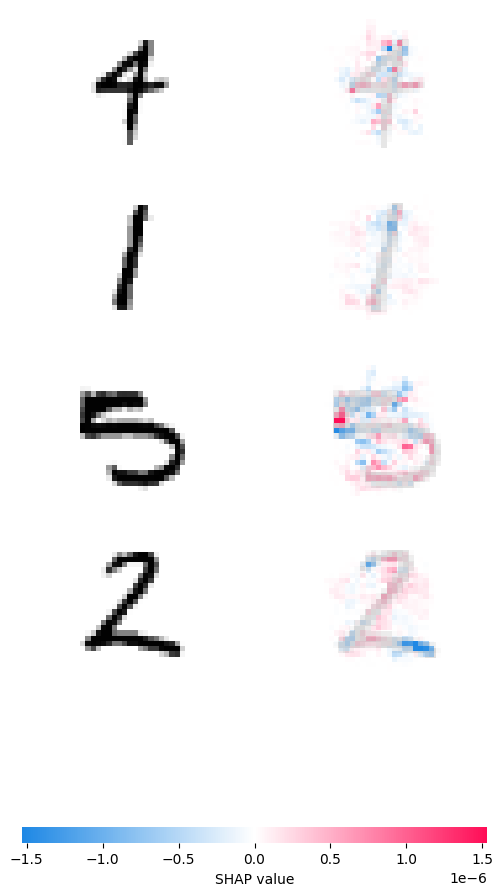

In [28]:
# Plotting the output of SHAP
shap.image_plot(shap_values, -x_train[start:end])